In [381]:
from HeaderP import *
from scipy.interpolate import interp1d

def getcolor(vrange,cm='plasma'):
    cmap = plt.cm.get_cmap(cm)
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

# Simulation Part

In [348]:
df = pd.read_csv('g2.79e12_fehscatter_simdata.csv')
ismslope = pd.read_pickle('../NIHAORbirth/ISM_slope_g279e12.pkl')
m2pattern = pd.read_pickle('ISM_slope_g279e12.pkl')
merger = pd.read_pickle('./g2.79e12_merger_Lucy.dat')

mergertimes = 13.8-merger['time']
mergervir = merger['vir_ratio']

agebin=np.linspace(0,14,50)
mass_ave = np.zeros(len(agebin)-1)

for i in range(len(agebin)-1):
    m = (mergertimes>agebin[i])&(mergertimes<agebin[i+1])
    #mass_ave[i] = sum(mergervir[m])
    if sum(m) == 0:
        mass_ave[i] = 0
    else:
        mass_ave[i] = sum(mergervir[m])/sum(m)

        
df_nobar = pd.read_csv('g7.55e11_fehscatter_simdata.csv')
ismslope_nobar = pd.read_pickle('../NIHAORbirth/ISM_slope_g755e11.pkl')
m2pattern_nobar = pd.read_pickle('ISM_slope_g755e11.pkl')
merger_nobar = pd.read_pickle('./g7.55e11_merger_Lucy.dat')

mergertimes_nobar = 13.8-np.array(merger_nobar['time'],dtype=float)
mergervir_nobar = np.array(merger_nobar['vir_ratio'],dtype=float)


mass_ave_nobar = np.zeros(len(agebin)-1)

for i in range(len(agebin)-1):
    m = (mergertimes_nobar>agebin[i])&(mergertimes_nobar<agebin[i+1])
    #mass_ave[i] = sum(mergervir[m])
    if sum(m) == 0:
        mass_ave_nobar[i] = 0
    else:
        mass_ave_nobar[i] = sum(mergervir_nobar[m])/sum(m)
        

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


10
7


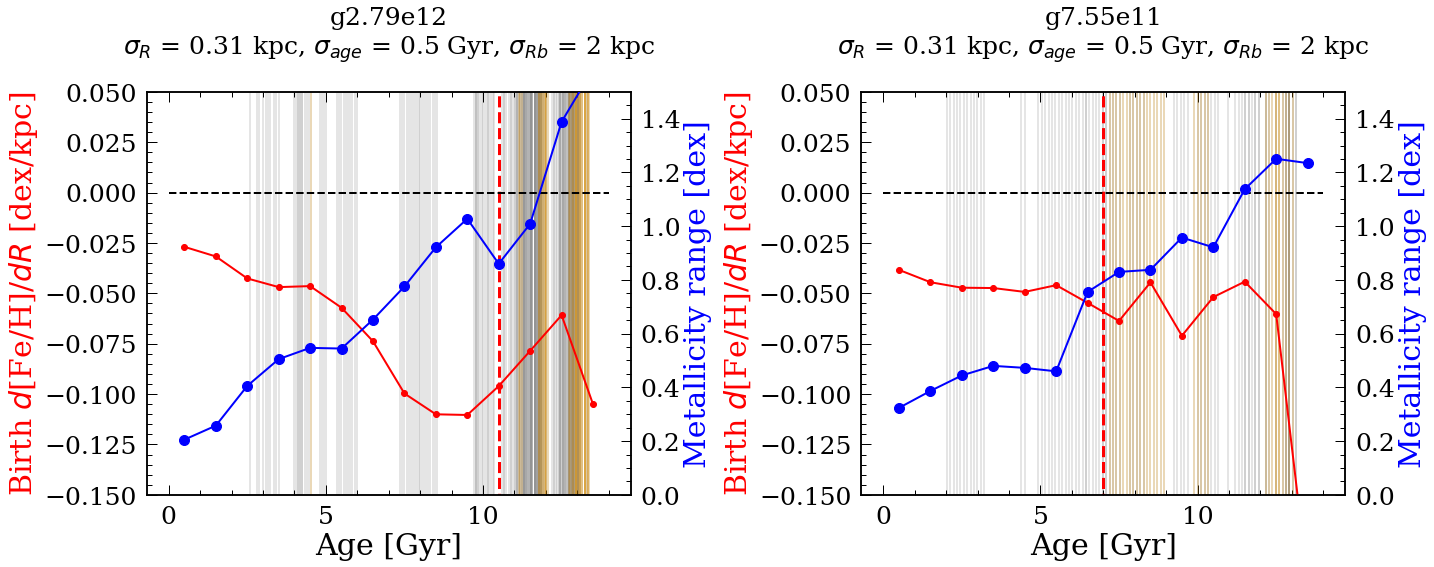

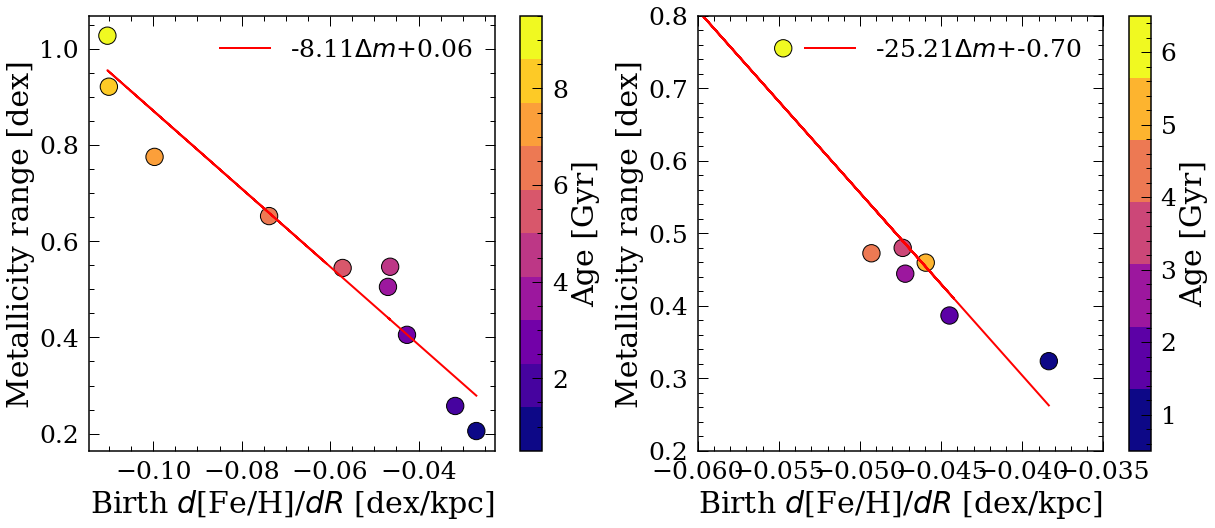

In [349]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
plt.plot(df['age'], df['slopes_rbir'], 'r-o',zorder=5)
plt.xlabel('Age [Gyr]')
plt.ylabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]', color='r',zorder=5)
m = mergervir>0.1
plt.vlines(mergertimes, ymin=-1, ymax=2, color='grey', alpha=0.2, zorder=1)
plt.vlines(mergertimes[m], ymin=-1, ymax=2, color='orange', alpha=0.2, zorder=2)
plt.vlines(10.5, ymin=-1, ymax=2, color='red', 
           linestyles='--', zorder=2, linewidth=3)
plt.plot([0,14],[0,0], 'k--',zorder=5)
plt.ylim([-0.15, 0.05])
plt.twinx()
plt.plot(df['age'], df['fehscatter'], 'b-o',zorder=5, markersize=10)
m = mergervir>0.1
plt.ylim([0,1.5])
plt.ylabel('Metallicity range [dex]', color='b',zorder=5)
plt.title('g2.79e12\n$σ_R$ = 0.31 kpc, $σ_{age}$ = 0.5 Gyr, $σ_{Rb}$ = 2 kpc\n', fontsize=25)


plt.subplot(1,2,2)
#plt.plot(df_nobar['age'], df_nobar['slopes'], 'r-o',zorder=5, markersize=10)
plt.plot(df_nobar['age'], df_nobar['slopes_rbir'], 'r-o',zorder=5)
plt.xlabel('Age [Gyr]')
plt.ylabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]', color='r',zorder=5)
m = mergervir_nobar>0.1
plt.vlines(mergertimes_nobar, ymin=-1, ymax=2, color='grey', alpha=0.2, zorder=1)
plt.vlines(mergertimes_nobar[m], ymin=-1, ymax=2, color='orange', alpha=0.2, zorder=2)
plt.vlines(7, ymin=-1, ymax=2, color='red', 
           linestyles='--', zorder=2, linewidth=3)
plt.plot([0,14],[0,0], 'k--',zorder=5)
plt.ylim([-0.15, 0.05])
plt.twinx()
plt.plot(df_nobar['age'], df_nobar['fehscatter'], 'b-o',zorder=5, markersize=10)
m = mergervir_nobar>0.1
plt.ylim([0,1.5])
plt.ylabel('Metallicity range [dex]', color='b',zorder=5)
plt.title('g7.55e11\n$σ_R$ = 0.31 kpc, $σ_{age}$ = 0.5 Gyr, $σ_{Rb}$ = 2 kpc\n', fontsize=25)
plt.tight_layout()
plt.savefig('Figures/eps/scatters_sim',bbox_inches='tight')
plt.savefig('Figures/scatters_sim.png',bbox_inches='tight')


plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
m = df['age']<10
print(sum(m))
x = df['slopes_rbir']
plt.scatter(x[m], df['fehscatter'][m], 
           c=df['age'][m], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', sum(m)))
p = fitpoints((x)[m], df['fehscatter'][m])
plt.xlabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]')
plt.ylabel('Metallicity range [dex]')
plt.plot(x, p(x), 'r-', 
         label="%.2f$Δm$+%.2f"%(p[1],p[0]))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()

plt.subplot(1,2,2)
m = df_nobar['age']<7
print(sum(m))
x = df_nobar['slopes_rbir']
plt.scatter(x[m], df_nobar['fehscatter'][m], 
           c=df_nobar['age'][m], s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', sum(m)))
p = fitpoints((x)[m], df_nobar['fehscatter'][m])
plt.xlabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]')
plt.ylabel('Metallicity range [dex]')
plt.plot(x, p(x), 'r-', 
         label="%.2f$Δm$+%.2f"%(p[1],p[0]))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlim([-0.06,-0.035])
plt.ylim([0.2,0.8])
plt.legend()
plt.savefig('Figures/eps/scatters_toslope_sim',bbox_inches='tight')
plt.savefig('Figures/scatters_toslope_sim.png',bbox_inches='tight')



# Data Part

In [360]:
from astropy.table import Table
sub = Table.read('subgiant_fullparam_update.fits', format='fits')
sub = sub.to_pandas()
sub_rbir = pd.read_csv('RbirLAMOST.csv')
sub_rbir.columns

sub_rbir = sub_rbir.rename(columns={'          rb': 'Rb', 
                                    '          rb_err': 'Rb_err',
                                   '       specid':'specid'})
sub['SPECID'] = [str(i.decode(encoding="utf-8").split()[0]) for i in sub['SPECID']]
sub_rbir['specid'] = [str(i.split()[0]) for i in sub_rbir['specid']]

sub_rbir = pd.merge(sub, 
               sub_rbir[['specid', 'Rb', 'Rb_err']], 
               left_on='SPECID', right_on='specid', how='inner')
print(len(sub_rbir), len(sub))

200674 247104


## selection

Before eccentricity cut:
247104 200674
After eccentricity cut:
227909 197211
2075.0 2824.324006004231
21383


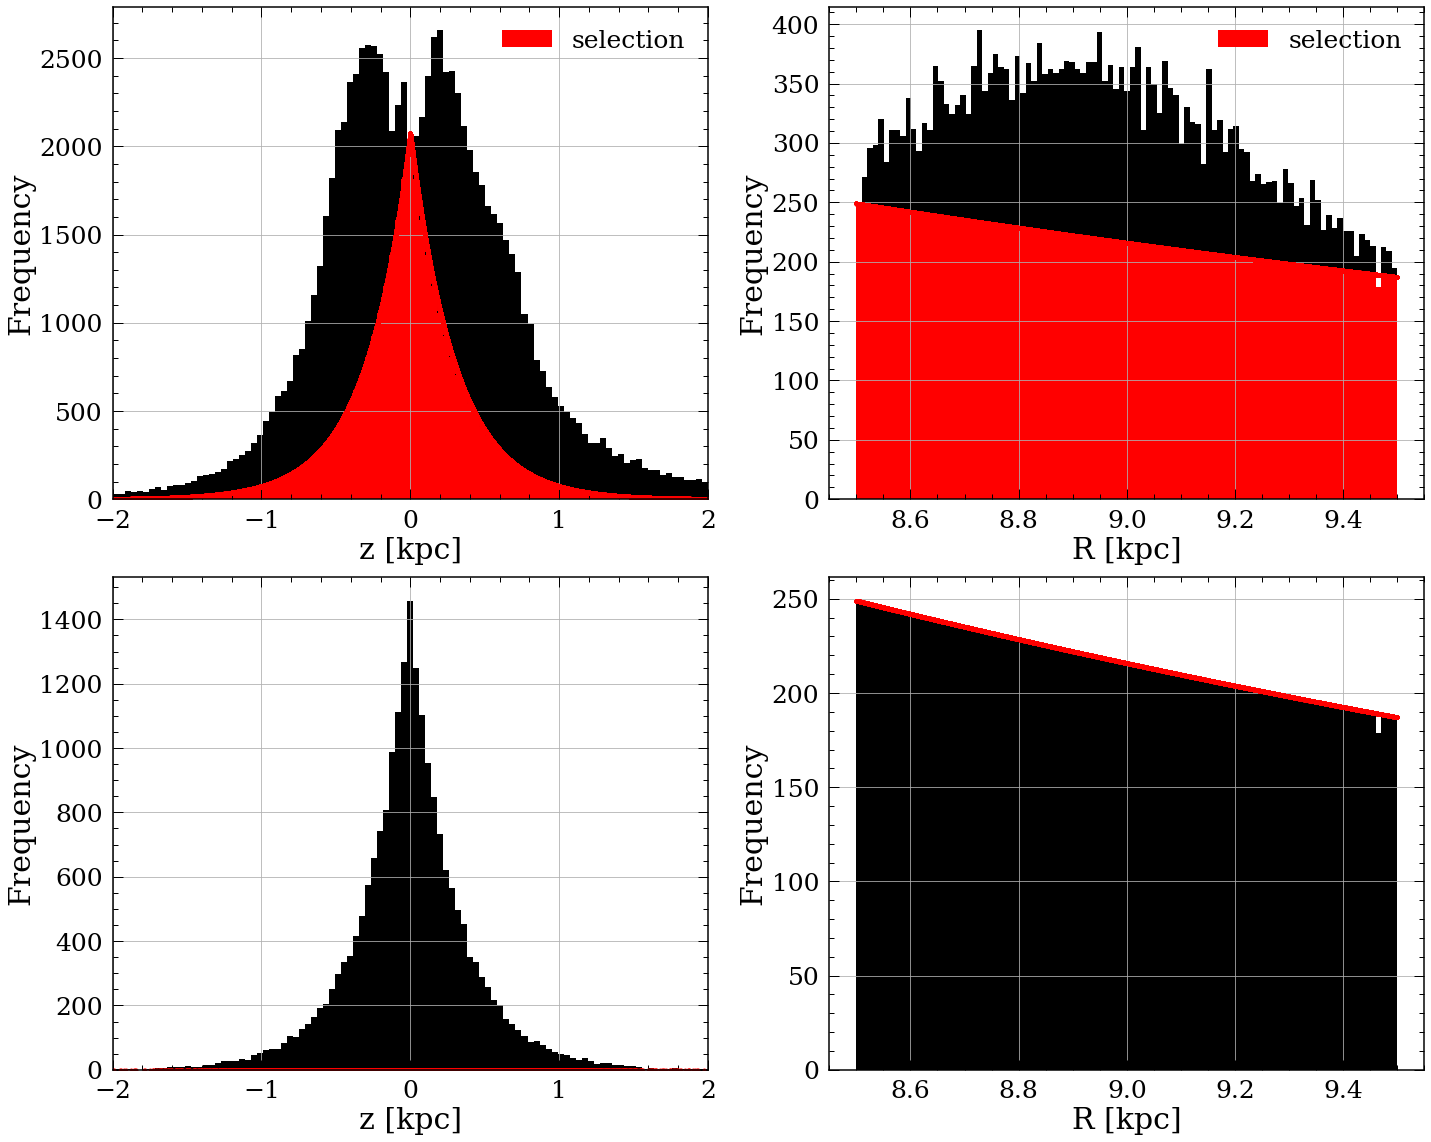

In [361]:
xrange = [8.5,9.5]
agebincalc = np.linspace(0,16,17)
#zsel_scale = 2500
#Rsel_scale = 2500

############## define selection function
def sel_fn(z, mult, scale):
    return mult*np.exp(-abs(z)/scale)
############## define selection function



"""sub = Table.read('subgiant_fullparam_update.fits', format='fits')
sub = sub.to_pandas()"""

print('Before eccentricity cut:')
print(len(sub), len(sub_rbir))
sub_rbir = sub_rbir.loc[abs(sub_rbir['ECC'])<0.5].reset_index(drop=True)
sub = sub.loc[abs(sub['ECC'])<0.5].reset_index(drop=True)

print('After eccentricity cut:')
print(len(sub), len(sub_rbir))

sub_check = sub.loc[(sub['R']>xrange[0])&(sub['R']<xrange[1])]
m = (abs(sub_check['Z'])<1)&(sub_check['AGE_ERR']<np.diff(agebincalc)[0])
m = m&(sub_check['AGE']>1.5)



##### select stars 
import random
m_sel = np.zeros(len(sub_check))
zbins = np.linspace(-2,2,100)
Rbins = np.linspace(xrange[0], xrange[1], 100)

zsel_scale = sum(abs(sub_check['Z'])<np.diff(zbins)[0])/2

for i in range(len(zbins)-1):
    m_sing = ((sub_check['Z'])>zbins[i])&((sub_check['Z'])<zbins[i+1])
    # number of stars to get
    nubstars = int(sel_fn((zbins[i]+zbins[i+1])/2, zsel_scale, 0.3))
    
    # get all the stars randomly
    randnum = list(range(sum(m_sing)))
    random.shuffle(randnum)
    random_ind = np.zeros(len(randnum))
    random_ind[randnum[:nubstars]] = 1
    
    m_sel[m_sing] = random_ind
m_sel = np.array(m_sel, dtype=bool)

# plot final histogram
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
(sub_check['Z']).hist(bins=zbins, color='k')
plt.plot((sub_check['Z']), sel_fn(sub_check['Z'], zsel_scale, 0.3), 'r.')
(sub_check['Z'][m_sel]).hist(bins=zbins, color='r', label='selection')
plt.xlabel('z [kpc]')
plt.ylabel('Frequency')
plt.xlim([-2,2])
plt.legend()

plt.subplot(2,2,2)
sub_check = sub_check[m_sel].reset_index(drop=True)
m_sel = np.zeros(len(sub_check))

Rsel_scale = sum((sub_check['R']>Rbins[0])&(sub_check['R']<Rbins[1]))/np.exp(-abs(xrange[0])/3.5)
print(zsel_scale, Rsel_scale)

for i in range(len(Rbins)-1):
    m_sing = (abs(sub_check['R'])>Rbins[i])&(abs(sub_check['R'])<Rbins[i+1])
    # number of stars to get
    nubstars = int(sel_fn((Rbins[i]+Rbins[i+1])/2, Rsel_scale, 3.5))
    
    # get all the stars randomly
    randnum = list(range(sum(m_sing)))
    random.shuffle(randnum)
    random_ind = np.zeros(len(randnum))
    random_ind[randnum[:nubstars]] = 1
    
    m_sel[m_sing] = random_ind
m_sel = np.array(m_sel, dtype=bool)

abs(sub_check['R']).hist(bins=Rbins, color='k')
plt.plot(abs(sub_check['R']), 
         sel_fn(sub_check['R'], Rsel_scale, 3.5), 'r.')
abs(sub_check['R'][m_sel]).hist(bins=Rbins, color='r', label='selection')
plt.xlabel('R [kpc]')
plt.ylabel('Frequency')
plt.legend()




### final final histogram
plt.subplot(2,2,3)
(sub_check['Z'][m_sel]).hist(bins=zbins, color='k')
plt.plot((sub_check['Z'][m_sel]), 
         sel_fn(sub_check['Z'][m_sel], 
                sum(abs(sub_check['Z'][m_sel])<zbins[1])/2, 0.3), 'r.')
plt.xlabel('z [kpc]')
plt.ylabel('Frequency')
plt.xlim([-2,2])

plt.subplot(2,2,4)
abs(sub_check['R'][m_sel]).hist(bins=Rbins, color='k')
plt.plot(abs(sub_check['R'][m_sel]), 
         sel_fn(sub_check['R'][m_sel], Rsel_scale, 3.5), 'r.')
plt.xlabel('R [kpc]')
plt.ylabel('Frequency')
plt.tight_layout()
print(sum(m_sel))

plt.tight_layout()
plt.savefig('Figures/eps/selectdata',bbox_inches='tight')
plt.savefig('Figures/selectdata.png',bbox_inches='tight')




<Figure size 576x576 with 0 Axes>

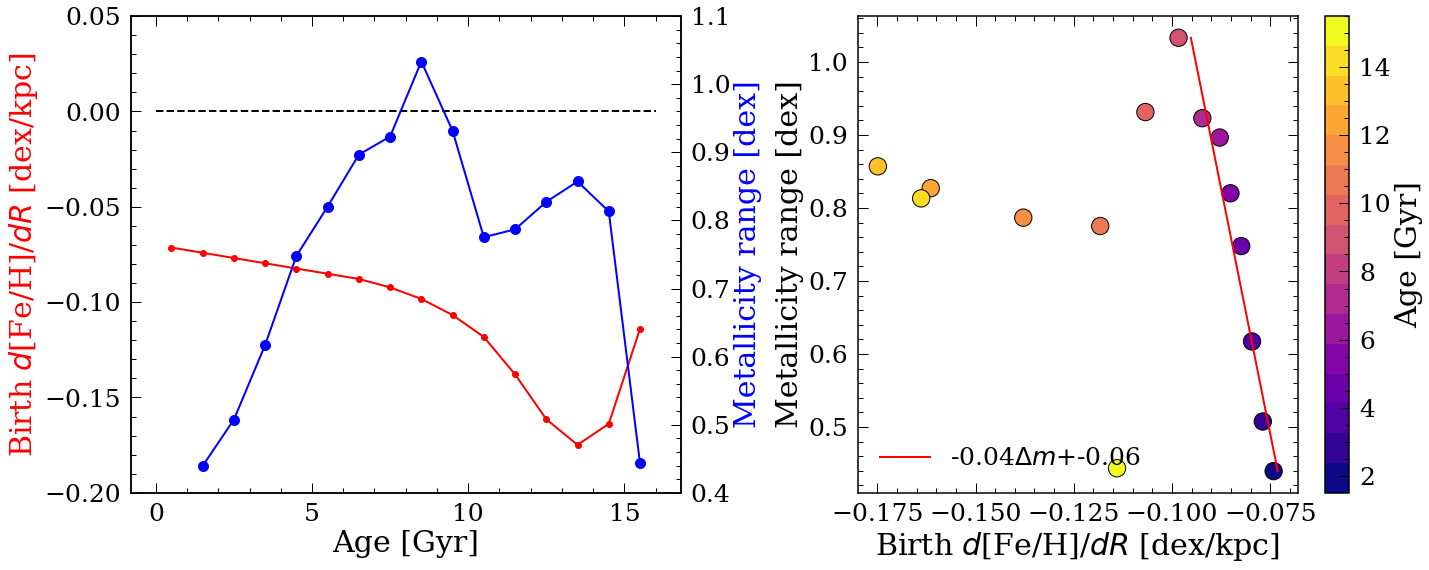

In [532]:
df = pd.read_csv('data_slopps.csv')
ages, slopes, fehscatter, slopes_rbir, fehscatter_rbir = df['age'], df['slopes'], df['fehscatter'], df['slopes_rbir'], df['fehscatter_rbir']

plt.figure(figsize=(8,8))
x = slopes_rbir

m2 = (ages<9)&(x==x)
m2 = m2&(fehscatter==fehscatter)


p = fitpoints(fehscatter[m2], x[m2])



plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
#plt.plot(df['age'], df['slopes'], 'r-o',zorder=5, markersize=10)
plt.plot(df['age'], df['slopes_rbir'], 'r-o',zorder=5)
plt.xlabel('Age [Gyr]')
plt.ylabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]', color='r',zorder=5)
m = mergervir>0.1
plt.plot([0,16],[0,0], 'k--',zorder=5)
plt.ylim([-0.2, 0.05])
plt.twinx()
plt.plot(df['age'], df['fehscatter'], 'b-o',zorder=5, markersize=10)
m = mergervir>0.1
plt.ylim([0.4,1.1])
plt.ylabel('Metallicity range [dex]', color='b',zorder=5)


plt.subplot(1,2,2)
plt.scatter(x, fehscatter, 
           c=ages, s=300, edgecolor='k', 
            cmap=plt.get_cmap('plasma', len(df)))
plt.plot(p(fehscatter)[m2],
         (fehscatter)[m2], 'r-', 
         label="%.2f$Δm$+%.2f"%(p[1],p[0]))
plt.xlabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]')
plt.ylabel('Metallicity range [dex]')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend(loc=3)
plt.tight_layout()
plt.savefig('Figures/eps/scatters_toslope_data',bbox_inches='tight')
plt.savefig('Figures/scatters_toslope_data.png',bbox_inches='tight')


slope_rbir_infer = np.zeros(len(fehscatter))
slope_rbir_infer[~m2] =p((fehscatter[~m2]))
slope_rbir_infer[m2] = slopes_rbir[m2]
df['slope_rbir_infer'] = slope_rbir_infer

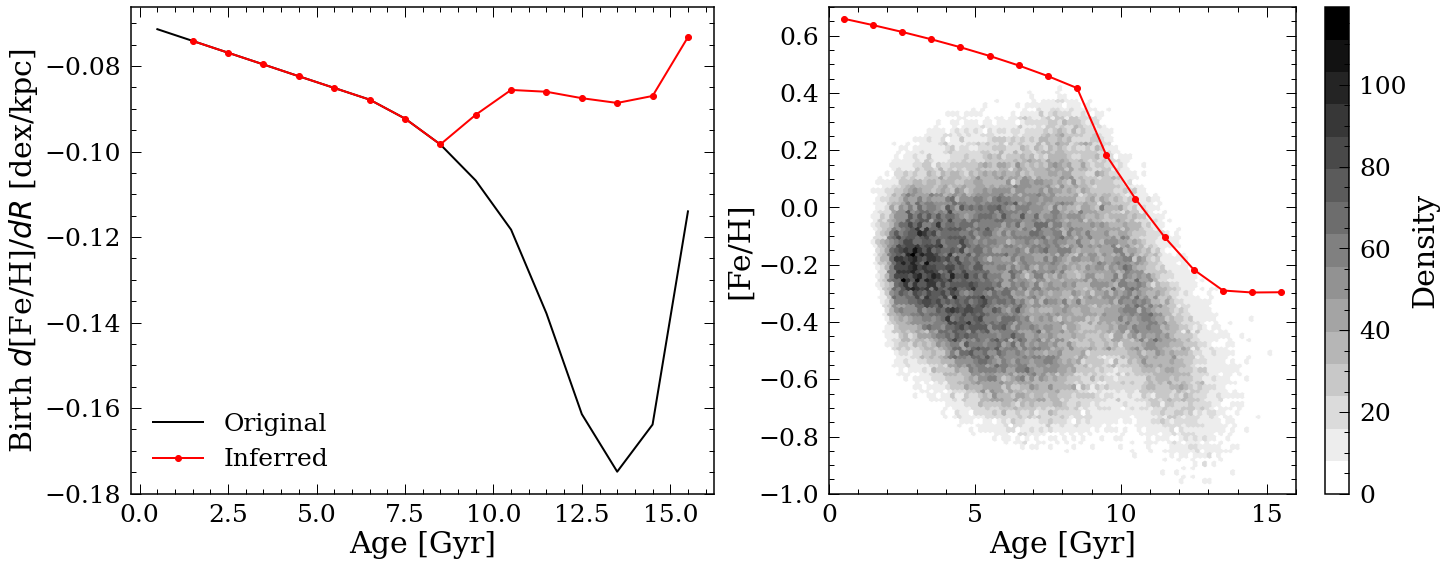

In [385]:
sub_tryRb = pd.read_pickle('NewRb.pkl')
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(ages, slopes_rbir, 'k-', label='Original')
plt.plot(ages, slope_rbir_infer, 'r-o', label='Inferred')
plt.ylabel('Birth $d$[Fe/H]/$dR$ [dex/kpc]')
plt.xlabel('Age [Gyr]')
plt.legend(loc=3)
plt.tight_layout()


df = pd.read_csv('slopes_cor.csv')
plt.subplot(1,2,2)
plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], cmap=plt.get_cmap('binary',15), 
           extent=(0,16,-1,0.7))
plt.plot(df['age'], df['feh_cor'], 'r-o')
plt.xlim([0,16])
plt.ylim([-1,0.7])
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.tight_layout()
cb = plt.colorbar()
cb.set_label('Density')

plt.savefig('Figures/eps/corrected_slope',bbox_inches='tight')
plt.savefig('Figures/corrected_slope.png',bbox_inches='tight')

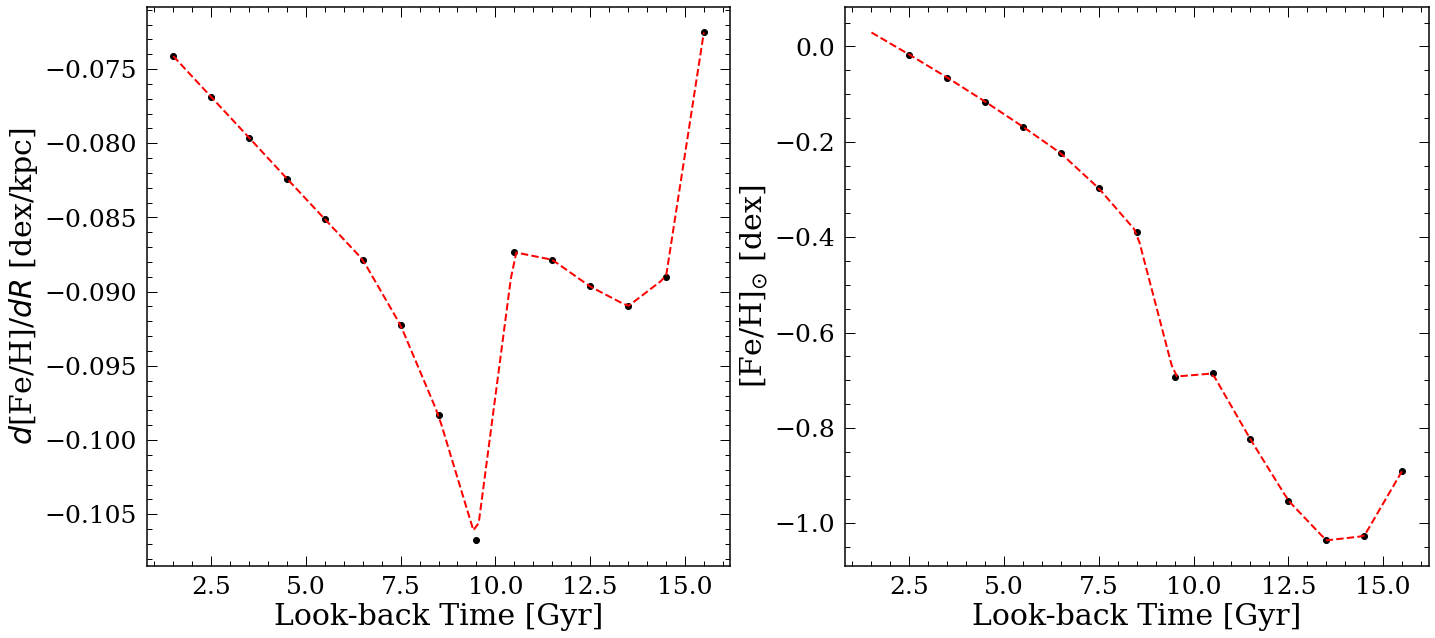

In [386]:
df = pd.read_csv('slopes_cor.csv')
mfit = (df['slope_cor']==df['slope_cor'])

slope_inf = interp1d(df['age'][mfit], df['slope_cor'][mfit],'linear')
ave_inf = interp1d(df['age'][mfit], df['feh_cor'][mfit],'linear')

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)

plt.plot(df['age'][mfit], df['slope_cor'][mfit], 'ko')
plt.plot(np.linspace(1.5,15.5,100), slope_inf(np.linspace(1.5,15.5,100)), 'r--')
plt.xlabel('Look-back Time [Gyr]')
plt.ylabel('$d$[Fe/H]/$dR$ [dex/kpc]')
#plt.vlines(12, ymin=-0.1, ymax=-0.07, color='k')


plt.subplot(1,2,2)
m = (df['age']>1.5)
plt.plot(df['age'][m], slope_inf(df['age'][m])*8.2+ave_inf(df['age'][m]), 'ko')
plt.plot(np.linspace(1.5,15.5,100), 
         slope_inf(np.linspace(1.5,15.5,100))*8.2+ave_inf(np.linspace(1.5,15.5,100)), 'r--')
plt.xlabel('Look-back Time [Gyr]')
plt.ylabel('[Fe/H]$_{\odot}$ [dex]')

plt.tight_layout()


plt.savefig('Figures/eps/finalfunc',bbox_inches='tight')
plt.savefig('Figures/finalfunc.png',bbox_inches='tight')

## With new Rb

In [387]:
sub_tryRb = pd.read_pickle('NewRb.pkl')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


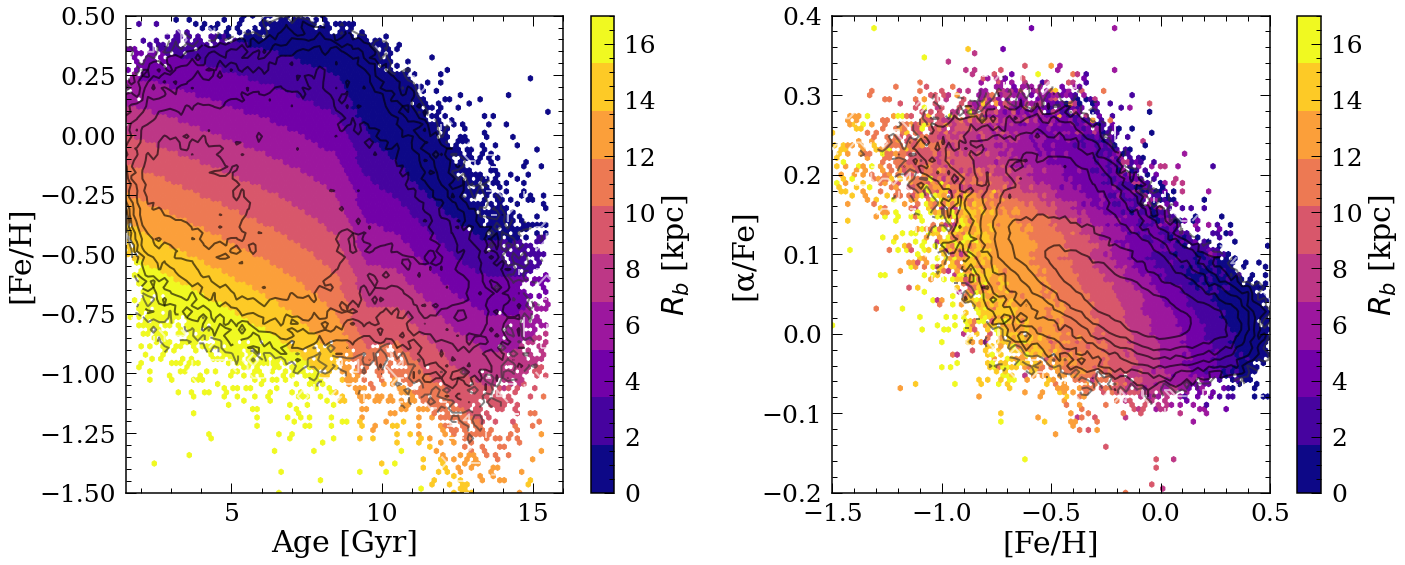

In [531]:
import plotly.express as px
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], C=sub_tryRb['Rb_new'], 
          vmin=0, vmax=17, cmap=plt.get_cmap('plasma',10),
          extent=(1.5,16,-1.5,0.5))
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')

counts, ybins, xbins = np.histogram2d(sub_tryRb['AGE'], sub_tryRb['FEH'], 
                                       bins=80,range=([1.5,16],[-1.5,0.5]))
plt.contour(np.log(counts).T, zorder=100, cmap='binary', linewidth=5,
           extent=[ybins.min(),ybins.max(),xbins.min(),xbins.max()],
           vmin=0, vmax=1, alpha=0.6)

plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
plt.xlim([1.5,16])
plt.ylim([-1.5,0.5])


plt.subplot(1,2,2)
plt.hexbin(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], C=sub_tryRb['Rb_new'], 
          vmin=0, vmax=17, cmap=plt.get_cmap('plasma',10),
          extent=(-1.5,0.5,-0.2,0.4))
plt.ylabel('[α/Fe]')
plt.xlabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')


counts, ybins, xbins = np.histogram2d(sub_tryRb['FEH'], sub_tryRb['ALPHA_FE'], 
                                       bins=80,range=([-1.5,0.5],[-0.2,0.4]))
plt.contour(np.log(counts).T, zorder=100, cmap='binary', linewidth=5,
           extent=[ybins.min(),ybins.max(),xbins.min(),xbins.max()],
            vmin=0, vmax=1, alpha=0.6)
plt.ylim([-0.2,0.4])
plt.xlim([-1.5,0.5])

plt.tight_layout()

plt.savefig('Figures/eps/feh_afe',bbox_inches='tight')
plt.savefig('Figures/feh_afe.png',bbox_inches='tight')


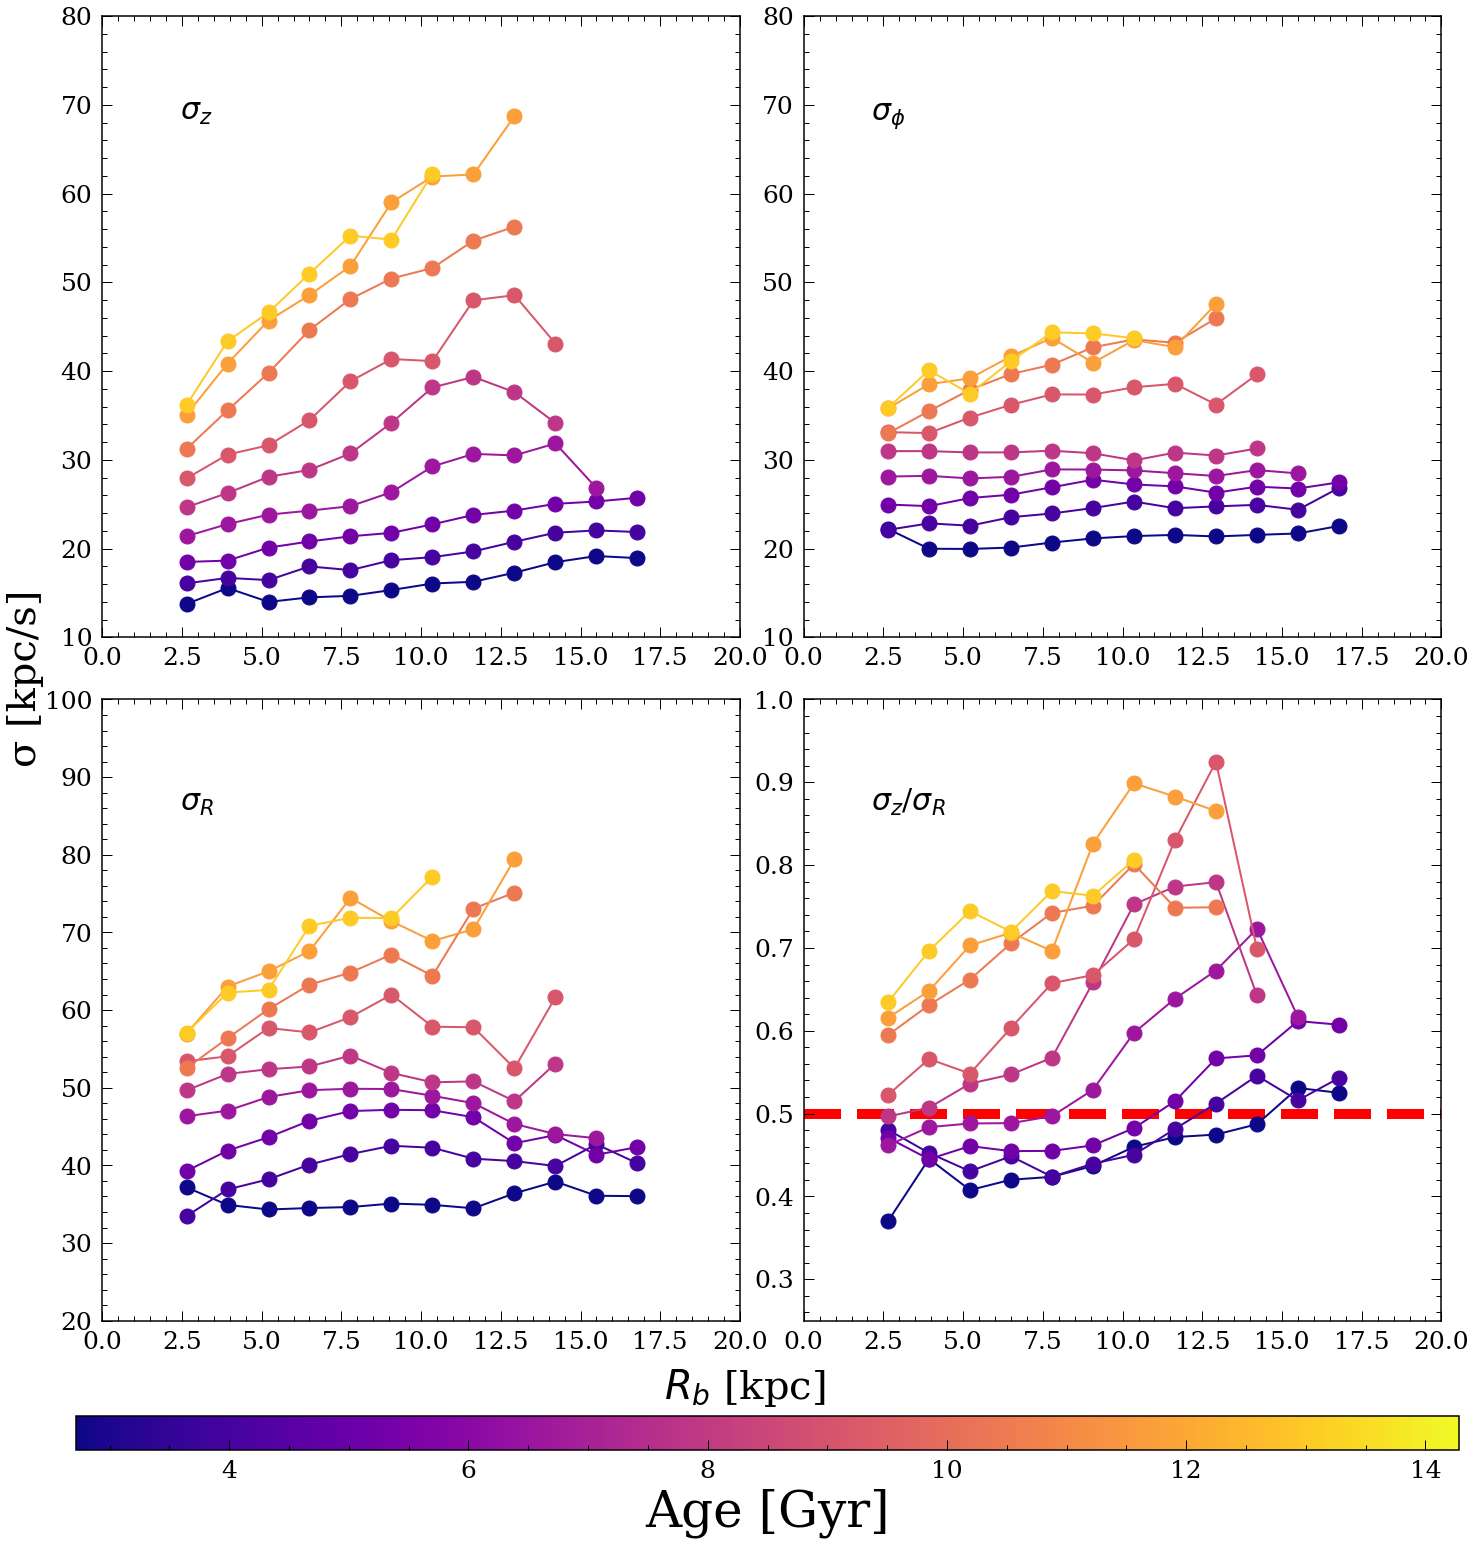

In [389]:
ages, rs, avrs_z, avrs_phi, avrs_r = np.load('vd_agebin.npy', allow_pickle=True)

colors = getcolor(np.linspace(2,15,10))


fig, axarr = plt.subplots(2,2,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},
                          figsize=(24,24))


fig.text(0.17, 0.82, '$σ_z$', fontsize=30)
fig.text(0.57, 0.82, '$σ_ϕ$', fontsize=30)
fig.text(0.17, 0.42, '$σ_R$', fontsize=30)
fig.text(0.57, 0.42, '$σ_z$/$σ_R$', fontsize=30)

fig.text(0.45, 0.08, '$R_b$ [kpc]', fontsize=40)
fig.text(0.07, 0.45, 'σ [kpc/s]', fontsize=40, rotation='vertical')


for i in range(len(rs)):
    axarr[0,0].plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,0].set_ylim([10, 80])
axarr[0,0].set_xlim([0,20])


for i in range(len(rs)):
    axarr[0,1].plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,1].set_ylim([10, 80])
axarr[0,1].set_xlim([0,20])


for i in range(len(rs)):
    axarr[1,0].plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[1,0].set_ylim([20, 100])
axarr[1,0].set_xlim([0,20])

for i in range(len(rs)):
    axarr[1,1].plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', 
                    color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15, zorder=10)
axarr[1,1].set_ylim([0.25, 1])
axarr[1,1].set_xlim([0,20])
im = axarr[1,1].scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap='plasma')
axarr[1,1].plot([0,20], [0.5,0.5], 'r--', linewidth=10, zorder=1)

cb_ax = fig.add_axes([0.11, 0.05, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


plt.savefig('Figures/eps/vd_agebin',bbox_inches='tight')
plt.savefig('Figures/vd_agebin.png',bbox_inches='tight')

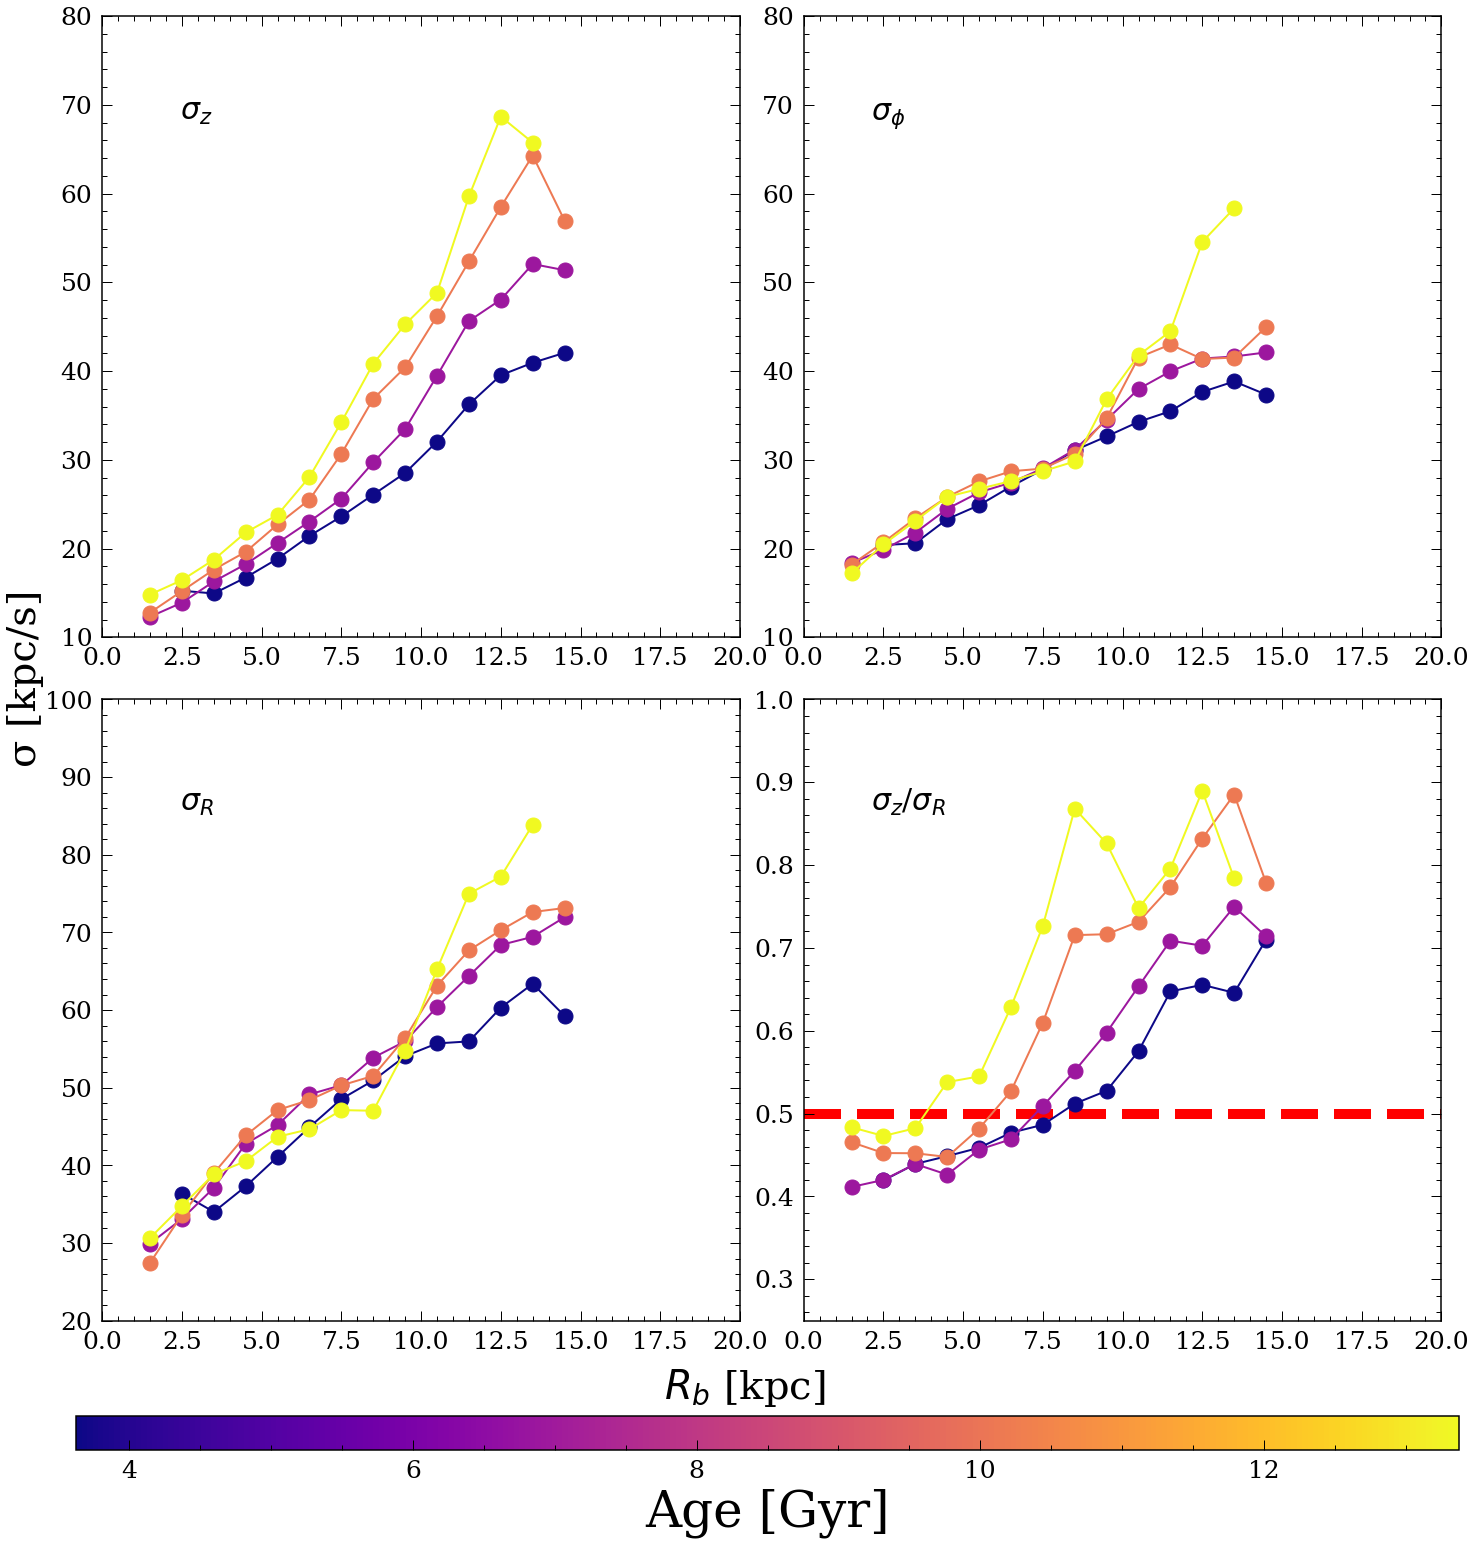

In [390]:
ages, rs, avrs_z, avrs_phi, avrs_r = np.load('vd_Rbin.npy', allow_pickle=True)

colors = getcolor(rs)


fig, axarr = plt.subplots(2,2,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},
                          figsize=(24,24))


fig.text(0.17, 0.82, '$σ_z$', fontsize=30)
fig.text(0.57, 0.82, '$σ_ϕ$', fontsize=30)
fig.text(0.17, 0.42, '$σ_R$', fontsize=30)
fig.text(0.57, 0.42, '$σ_z$/$σ_R$', fontsize=30)

fig.text(0.45, 0.08, '$R_b$ [kpc]', fontsize=40)
fig.text(0.07, 0.45, 'σ [kpc/s]', fontsize=40, rotation='vertical')


for i in range(len(rs)):
    axarr[0,0].plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,0].set_ylim([10, 80])
axarr[0,0].set_xlim([0,20])


for i in range(len(rs)):
    axarr[0,1].plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[0,1].set_ylim([10, 80])
axarr[0,1].set_xlim([0,20])


for i in range(len(rs)):
    axarr[1,0].plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
axarr[1,0].set_ylim([20, 100])
axarr[1,0].set_xlim([0,20])

for i in range(len(rs)):
    axarr[1,1].plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', 
                    color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15, zorder=10)
axarr[1,1].set_ylim([0.25, 1])
axarr[1,1].set_xlim([0,20])
im = axarr[1,1].scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap='plasma')
axarr[1,1].plot([0,20], [0.5,0.5], 'r--', linewidth=10, zorder=1)

cb_ax = fig.add_axes([0.11, 0.05, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)



plt.savefig('Figures/eps/vd_Rbin',bbox_inches='tight')
plt.savefig('Figures/vd_Rbin.png',bbox_inches='tight')



In [391]:
import warnings
warnings.filterwarnings('ignore')

def movingMed_time(x,y,x_window,delta_x_window):
    # medians output
    x_med=np.zeros(len(x))
    y_med=np.zeros(len(y))

    # define the boundaries of the windows
    if len(x)==0:
        return x_med,y_med
    window_min=float(min(x))
    window_max=float(window_min+delta_x_window)
    
    # max time
    maxtime=max(x)
    
    # break when time window hits the end
    while window_max<=maxtime+x_window:
        seldf=(x>=window_min) & (x<=window_max) # get points between the window
        if sum(seldf)<30:
            x_med[seldf]=np.nan
            y_med[seldf]=np.nan
        else:
            x_med[seldf]=np.median(x[seldf]) # all values for these indices are subsituded with median time
            y_med[seldf]=np.median(y[seldf]) # all values for these indices are subsituded with median flux

        # slide the window
        window_min=window_min+delta_x_window
        window_max=window_max+delta_x_window
    return x_med, y_med

100%|██████████| 19/19 [00:08<00:00,  2.11it/s]


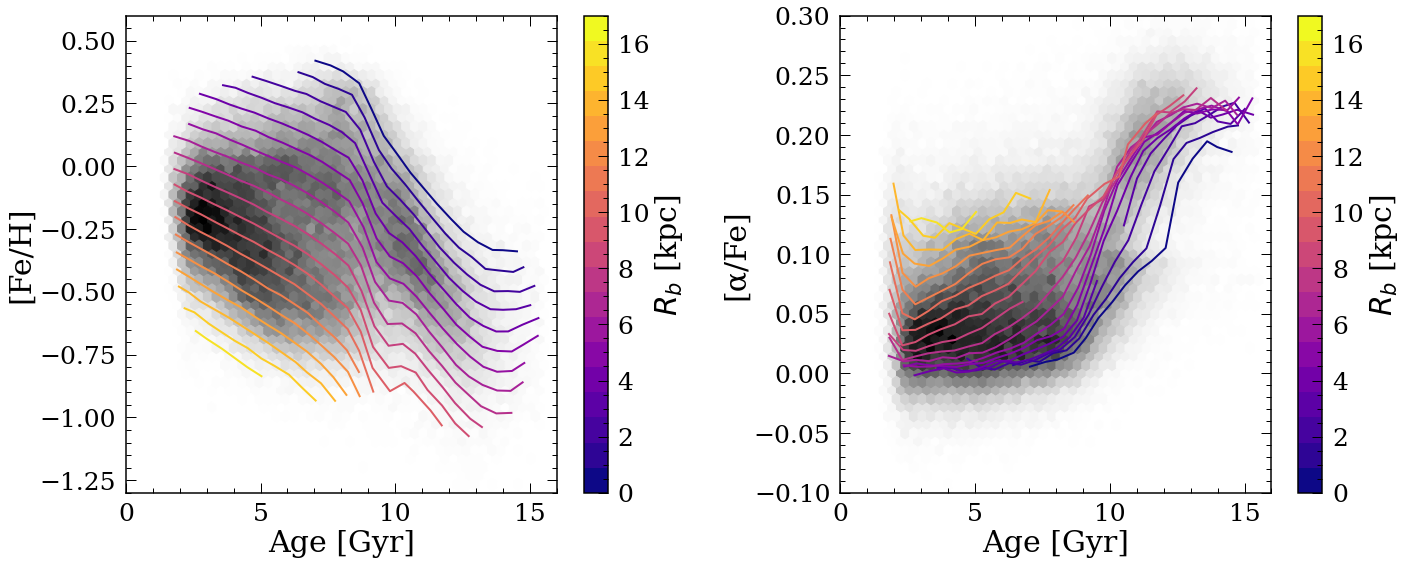

In [392]:
Rbbin = np.linspace(0,17,20)
color_amr = getcolor(range(len(Rbbin)))

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(sub_tryRb['AGE'], sub_tryRb['FEH'], cmap='binary',
          extent=(0,16,-1.3,0.6), gridsize=50, mincnt=1)

"""sub_tryRb = sub_tryRb.sort_values(by='AGE')
age_rbnow, feh_rbnow = movingMed_time(sub_tryRb['AGE'], sub_tryRb['FEH'],
                                     1,0.5)
plt.plot(age_rbnow, feh_rbnow, 'r-')"""

for i in trange(len(Rbbin)-1):
    m = (sub_tryRb['Rb']>Rbbin[i])&(sub_tryRb['Rb']<Rbbin[i+1])
    age_amr_all, feh_amr_all = sub_tryRb['AGE'].values[m], sub_tryRb['FEH'].values[m]
    age_amr_all, feh_amr_all = zip(*sorted(zip(age_amr_all, feh_amr_all)))
    age_amr_all, feh_amr_all = np.array(age_amr_all), np.array(feh_amr_all)
    age_amr, feh_amr = movingMed_time(age_amr_all, feh_amr_all,
                                     1,0.5)
    plt.plot(age_amr, feh_amr, '-', color=color_amr[i], linewidth=2)
    plt.xlim([0,16])
    plt.ylim([-1.3,0.6])
plt.scatter(-100,-100, c=0, vmin=min(Rbbin), vmax=max(Rbbin), 
            cmap=plt.get_cmap('plasma', len(Rbbin)-1))
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')


plt.subplot(1,2,2)
plt.hexbin(sub_tryRb['AGE'], sub_tryRb['ALPHA_FE'], cmap='binary',
          extent=(0,16,-0.1,0.3), gridsize=50, mincnt=1)
for i in trange(len(Rbbin)-1):
    m = (sub_tryRb['Rb']>Rbbin[i])&(sub_tryRb['Rb']<Rbbin[i+1])
    age_amr_all, feh_amr_all = sub_tryRb['AGE'].values[m], sub_tryRb['ALPHA_FE'].values[m]
    age_amr_all, feh_amr_all = zip(*sorted(zip(age_amr_all, feh_amr_all)))
    age_amr_all, feh_amr_all = np.array(age_amr_all), np.array(feh_amr_all)
    age_amr, feh_amr = movingMed_time(age_amr_all, feh_amr_all,
                                     1,0.5)
    #feh_amr = gaussian_filter(feh_amr, 0.5)
    plt.plot(age_amr, feh_amr, '-', color=color_amr[i], linewidth=2)
    plt.xlim([0,16])
    plt.ylim([-0.1,0.3])
plt.scatter(-100,-100, c=0, vmin=min(Rbbin), vmax=max(Rbbin), 
            cmap=plt.get_cmap('plasma', len(Rbbin)-1))
plt.xlabel('Age [Gyr]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('$R_b$ [kpc]')
plt.tight_layout()

plt.savefig('Figures/eps/afe_evol',bbox_inches='tight')
plt.savefig('Figures/afe_evol.png',bbox_inches='tight')



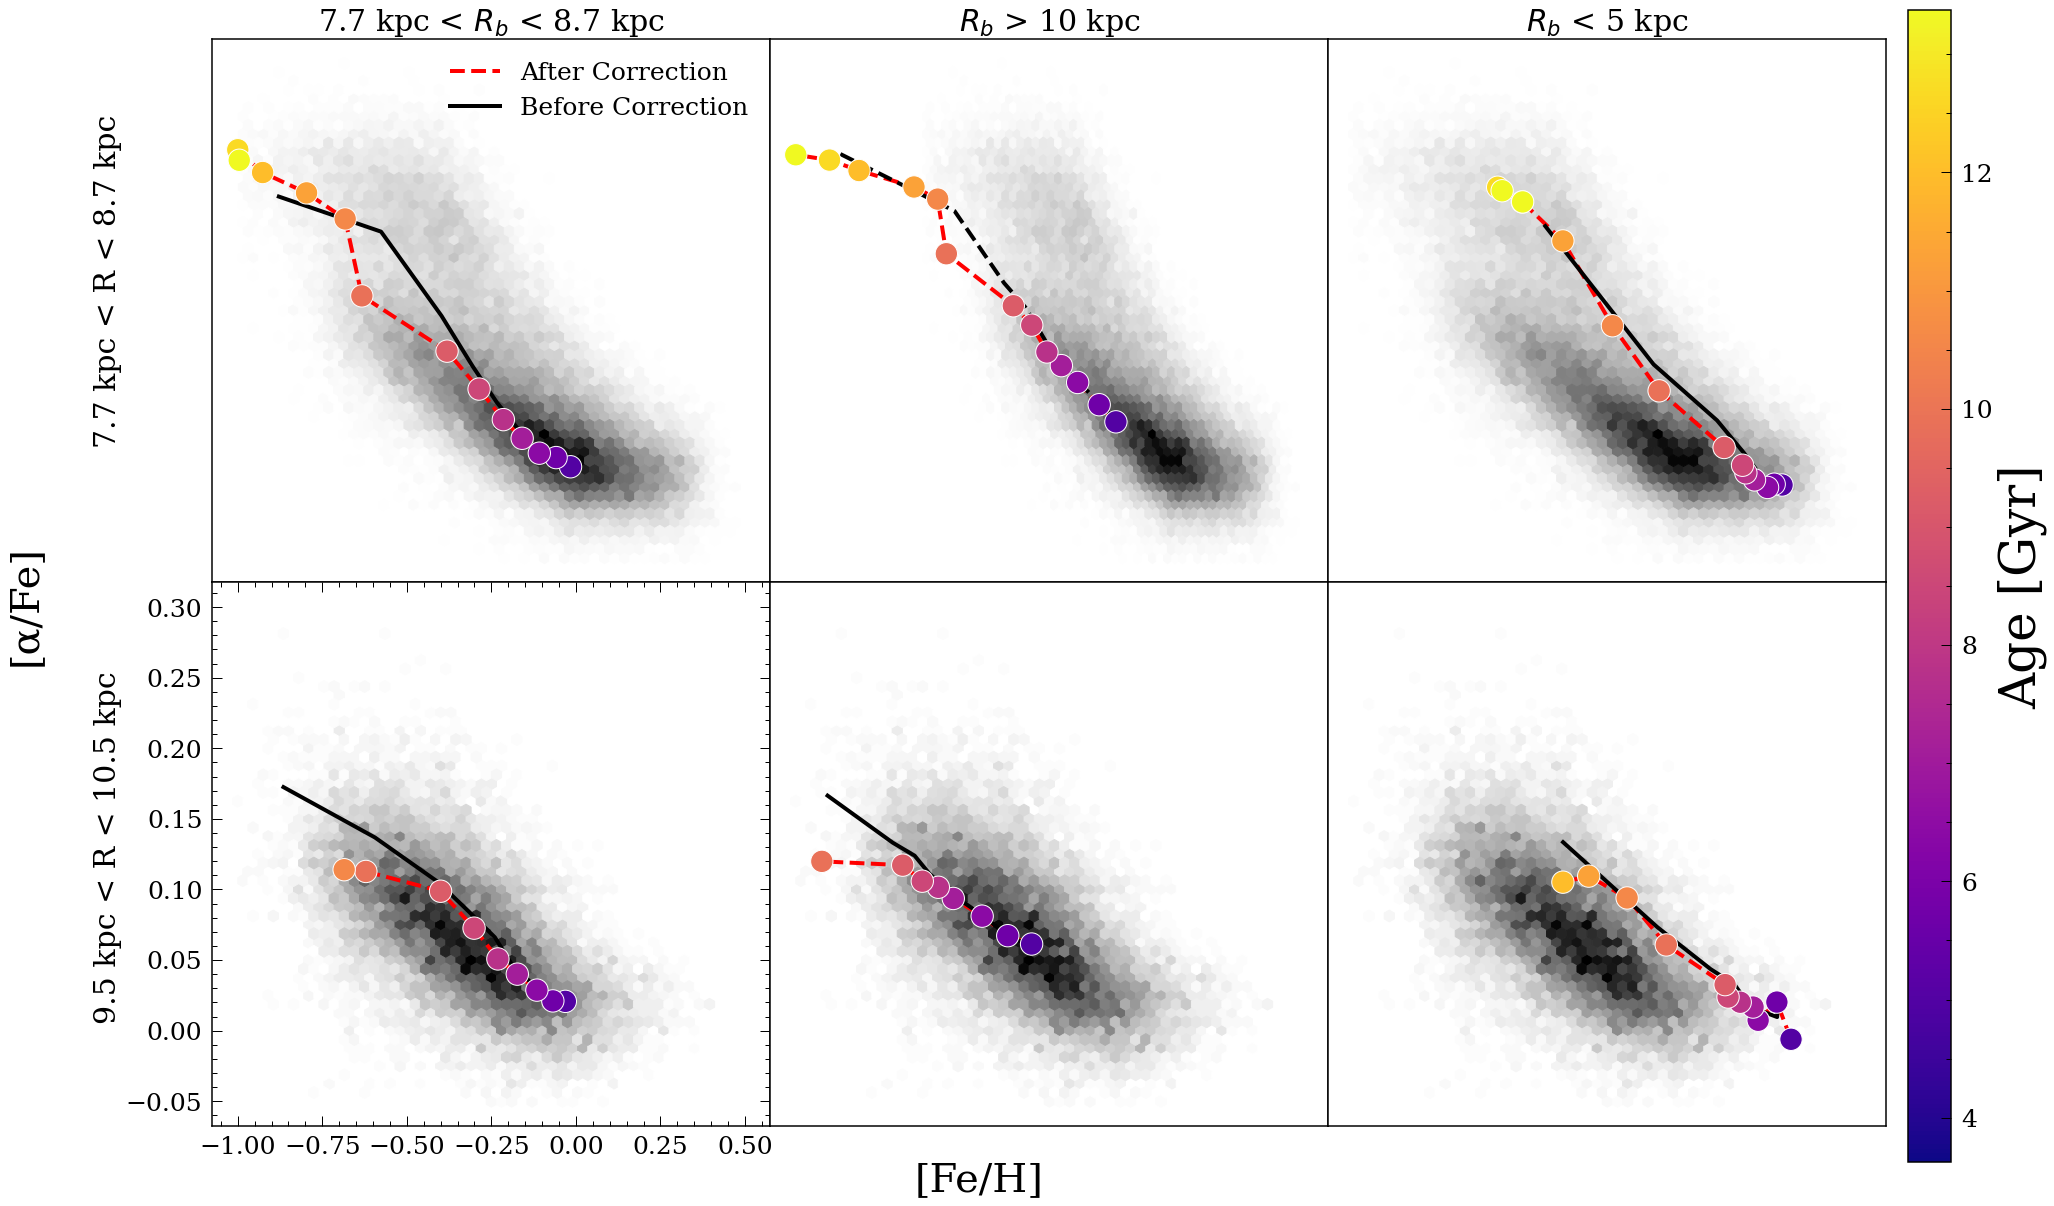

In [402]:
agebin = np.linspace(2,17,16)
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)


fig, axarr = plt.subplots(2,3,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(30,20))



sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R']-8.2)<0.5].reset_index(drop=True)
sub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R']-8.2)<0.5].reset_index(drop=True)

axarr[0,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())

axarr[0,0].plot(meanfeh, meanafe, 'r--', linewidth=4, label='After Correction')
axarr[0,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,0].set_title('7.7 kpc < $R_b$ < 8.7 kpc', fontsize=30)
# plot old Rb
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,0].plot(meanfeh, meanafe, 'k-', linewidth=4, label='Before Correction')        
axarr[0,0].legend()





axarr[0,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)
axarr[0,1].set_title('$R_b$ > 10 kpc', fontsize=30)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,1].plot(meanfeh, meanafe, 'k--', linewidth=4, label='Before Correction')        


axarr[0,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,2].set_title('$R_b$ < 5 kpc', fontsize=30)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[0,2].plot(meanfeh, meanafe, 'k-', linewidth=4, label='Before Correction')        








sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R']-10)<0.5].reset_index(drop=True)
sub_tryRb_sn_old = sub_rbir.loc[abs(sub_rbir['R']-10)<0.5].reset_index(drop=True)


axarr[1,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,0].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,0].plot(meanfeh, meanafe, 'k-', linewidth=4)        




axarr[1,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])>10)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,1].plot(meanfeh, meanafe, 'k-', linewidth=4)    


axarr[1,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn_old['AGE']>agebin[i])&(sub_tryRb_sn_old['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn_old['Rb'])<5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn_old['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn_old['ALPHA_FE'].values[m]).dropna())
axarr[1,2].plot(meanfeh, meanafe, 'k-', linewidth=4)   


axarr[0,0].set_xticks([])
axarr[0,1].set_xticks([])
axarr[0,2].set_xticks([])
axarr[1,1].set_xticks([])
axarr[1,2].set_xticks([])

axarr[0,0].set_yticks([])
axarr[0,1].set_yticks([])
axarr[0,2].set_yticks([])
axarr[1,1].set_yticks([])
axarr[1,2].set_yticks([])


fig.text(0.45, 0.08, '[Fe/H]', fontsize=40)
fig.text(0.03, 0.45, '[α/Fe]', fontsize=40, rotation='vertical')

fig.text(0.07, 0.2, '9.5 kpc < R < 10.5 kpc', fontsize=30, rotation='vertical')
fig.text(0.07, 0.6, '7.7 kpc < R < 8.7 kpc', fontsize=30, rotation='vertical')


cb_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'vertical')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)

plt.savefig('Figures/eps/timeevol',bbox_inches='tight')
plt.savefig('Figures/timeevol.png',bbox_inches='tight')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

(-0.1, 0.3)

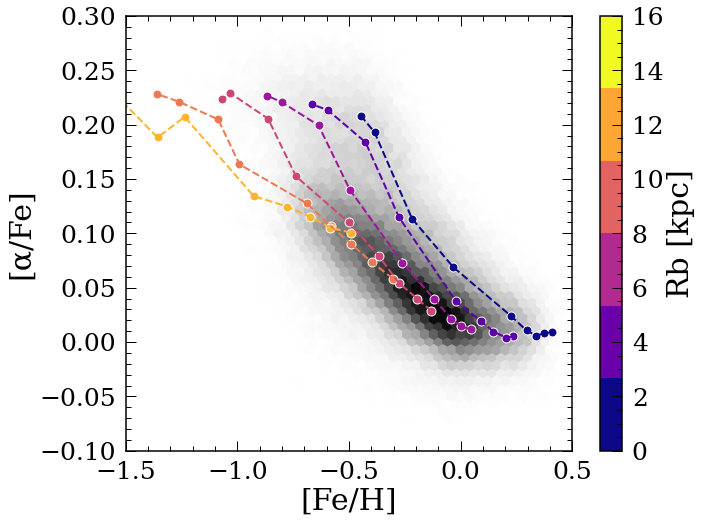

In [454]:
def drawArrow(A, B, colors):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=0.01, head_length=0.03, 
              length_includes_head = True,
              color=colors)
    
agebin = np.linspace(2,15,10)
Rbbin = np.linspace(0,16,7)

colors = getcolor(Rbbin)

sub_tryRb_sn = sub_tryRb.loc[abs(sub_tryRb['R']-8.2)<100].reset_index(drop=True)

plt.figure(figsize=(10,8))
plt.hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1.5,0.5,-0.1,0.3), gridsize=50, mincnt=1)

for j in range(len(Rbbin)-1):
    meanfeh = np.zeros(len(agebin)-1)
    meanafe = np.zeros(len(agebin)-1)
    for i in range(len(agebin)-1):
        m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
        m = m&(sub_tryRb_sn['Rb']>Rbbin[j])
        m = m&(sub_tryRb_sn['Rb']<Rbbin[j+1])
        if sum(m)<5:
            meanfeh[i] = np.nan
            meanafe[i] = np.nan
        else:
            meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
            meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
    plt.plot(meanfeh, meanafe, '--', color=colors[j])
    plt.scatter(meanfeh, meanafe, c = colors[j], 
                s=80, edgecolor='w',
                cmap=plt.get_cmap('plasma', len(Rbbin)-1),
               vmin=Rbbin[0], vmax=Rbbin[-1])
    """for i in range(len(meanfeh)-1):
        if agebin[i]<14:
            drawArrow([meanfeh[i+1],meanafe[i+1]],
                  [meanfeh[i],meanafe[i]], colors[j])"""


plt.scatter(-100, -100, c = 10, 
            s=80, cmap=plt.get_cmap('plasma', len(Rbbin)-1),
           vmin=Rbbin[0], vmax=Rbbin[-1])

plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
cb = plt.colorbar()
cb.set_label('Rb [kpc]')
plt.xlim([-1.5,0.5])
plt.ylim([-0.1,0.3])
#plt.title('7.7 kpc < Rb_corrected < 8.7 kpc', fontsize=25)

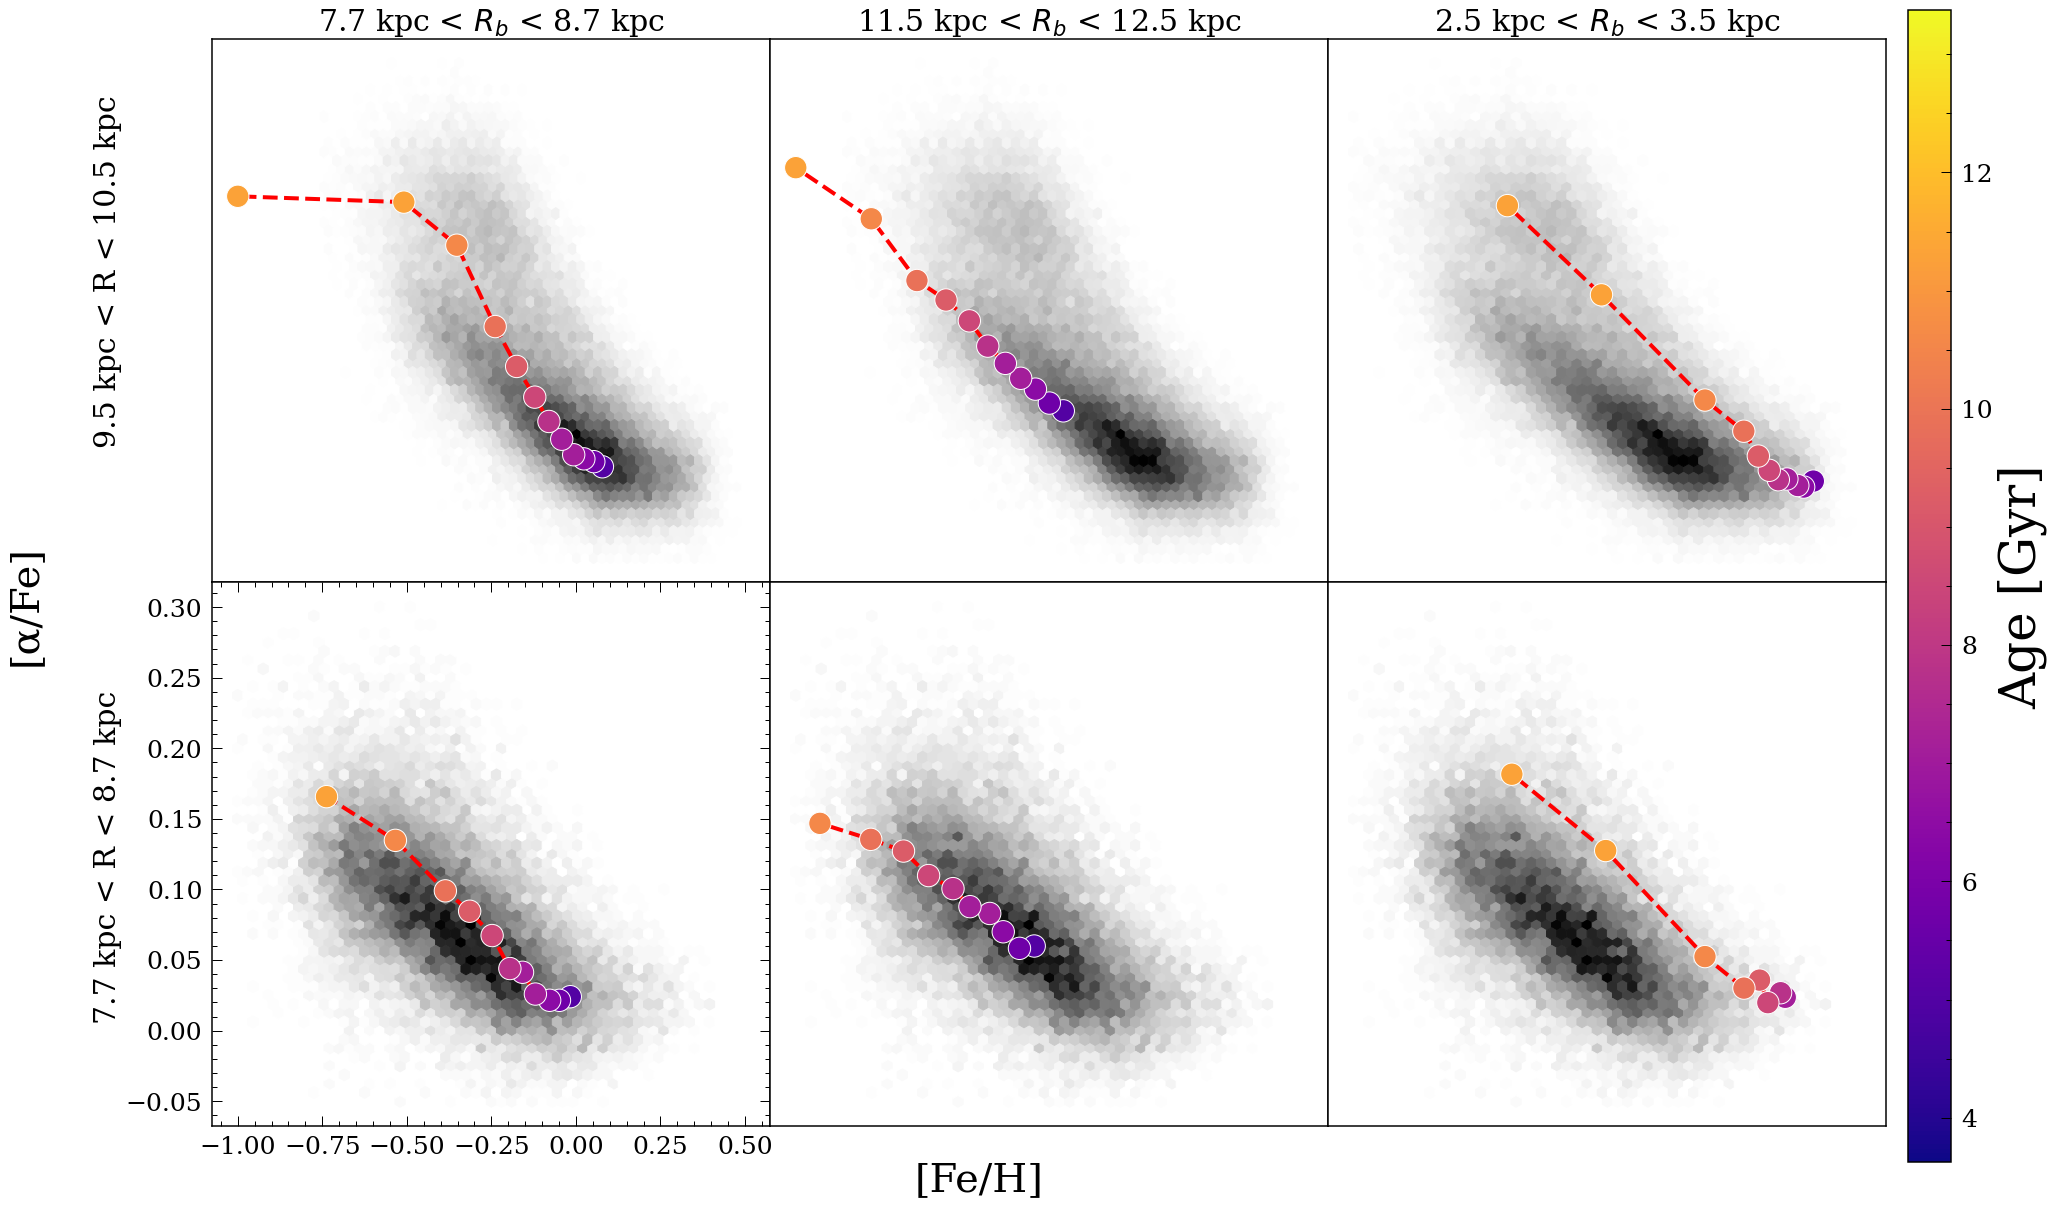

In [394]:
agebin = np.linspace(2,15,16)
meanfeh = np.zeros(len(agebin)-1)
meanafe = np.zeros(len(agebin)-1)


fig, axarr = plt.subplots(2,3,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(30,20))



sub_tryRb_sn = sub_rbir.loc[abs(sub_rbir['R']-8.2)<0.5].reset_index(drop=True)

axarr[0,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,0].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,0].set_title('7.7 kpc < $R_b$ < 8.7 kpc', fontsize=30)



axarr[0,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-12)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)
axarr[0,1].set_title('11.5 kpc < $R_b$ < 12.5 kpc', fontsize=30)



axarr[0,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-3)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[0,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[0,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)
axarr[0,2].set_title('2.5 kpc < $R_b$ < 3.5 kpc', fontsize=30)
#plt.tight_layout()





sub_tryRb_sn = sub_rbir.loc[abs(sub_rbir['R']-10)<0.5].reset_index(drop=True)

axarr[1,0].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-8.2)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,0].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,0].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
           s=500, edgecolor='w', zorder=10)


axarr[1,1].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-12)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,1].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,1].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)


axarr[1,2].hexbin(sub_tryRb_sn['FEH'], sub_tryRb_sn['ALPHA_FE'], cmap='binary',
          extent=(-1,0.5,-0.05,0.3), gridsize=50, mincnt=1)
for i in range(len(agebin)-1):
    m = (sub_tryRb_sn['AGE']>agebin[i])&(sub_tryRb_sn['AGE']<agebin[i+1])
    m = m&(abs(sub_tryRb_sn['Rb']-3)<0.5)
    if sum(m)<10:
        meanfeh[i] = np.nan
        meanafe[i] = np.nan
    else:
        meanfeh[i] = np.median(pd.Series(sub_tryRb_sn['FEH'].values[m]).dropna())
        meanafe[i] = np.median(pd.Series(sub_tryRb_sn['ALPHA_FE'].values[m]).dropna())
axarr[1,2].plot(meanfeh, meanafe, 'r--', linewidth=4)
axarr[1,2].scatter(meanfeh, meanafe, c = (agebin[1:]+agebin[:-1])/2,
           vmin=0, vmax=15, cmap=plt.get_cmap('plasma', len(meanfeh)), 
            s=500, edgecolor='w', zorder=10)


axarr[0,0].set_xticks([])
axarr[0,1].set_xticks([])
axarr[0,2].set_xticks([])
axarr[1,1].set_xticks([])
axarr[1,2].set_xticks([])

axarr[0,0].set_yticks([])
axarr[0,1].set_yticks([])
axarr[0,2].set_yticks([])
axarr[1,1].set_yticks([])
axarr[1,2].set_yticks([])


fig.text(0.45, 0.08, '[Fe/H]', fontsize=40)
fig.text(0.03, 0.45, '[α/Fe]', fontsize=40, rotation='vertical')

fig.text(0.07, 0.2, '7.7 kpc < R < 8.7 kpc', fontsize=30, rotation='vertical')
fig.text(0.07, 0.6, '9.5 kpc < R < 10.5 kpc', fontsize=30, rotation='vertical')


cb_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'vertical')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)

plt.savefig('Figures/eps/timeevol',bbox_inches='tight')
plt.savefig('Figures/timeevol.png',bbox_inches='tight')

100%|██████████| 14/14 [00:13<00:00,  1.01it/s]


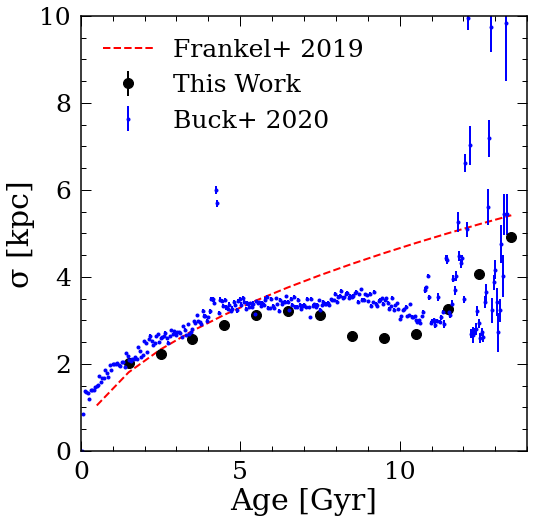

In [397]:
from astropy import units as u
from astropy import uncertainty as unc

sub_tryRb['R_err'] = (sub_tryRb['PARALLAX'])**-2*(sub_tryRb['PARALLAX_ERROR'])


agebincalc_rm = np.linspace(0,14,15)
mean_dr = np.zeros(len(agebincalc_rm)-1)
mean_dr_err = np.zeros(len(agebincalc_rm)-1)

sub_tryRb['AGE_sca'] = sub_tryRb['AGE']/max(sub_tryRb['AGE'])*13.8
sub_tryRb = sub_tryRb.loc[sub_tryRb['AGE_ERR']<np.diff(agebincalc_rm)[0]]

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb.loc[(sub_tryRb['AGE_sca']>agebincalc_rm[i])&(sub_tryRb['AGE_sca']<agebincalc_rm[i+1])]
    #mean_dr[i] = np.std(sub_tryRb_sing['Rb_new']-sub_tryRb_sing['R'])    
    #mean_dr_err[i] = mean_dr[i]/(len(sub_tryRb_sing)-1)
    
    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb_new','R_err','R'])
    sub_tryRb_sing = sub_tryRb_sing.loc[sub_tryRb_sing['R_err']<1]
    
    if len(sub_tryRb_sing)<30:
        mean_dr[i] = np.nan
        mean_dr_err[i] = np.nan
        continue
    Rbdist = unc.normal(sub_tryRb_sing['Rb_new'].values, 
                     std=sub_tryRb_sing['R_err'].values, 
                     n_samples=1000)
    Rdist = unc.normal(sub_tryRb_sing['R'].values, 
                     std=sub_tryRb_sing['R_err'].values, 
                     n_samples=1000)
    
    drdist = np.std(Rbdist-Rdist)
    
    mean_dr[i] = drdist.pdf_median()
    mean_dr_err[i] = np.median(np.sqrt(drdist.pdf_var()))
    
    
plt.figure(figsize=(8,8))
dR_sim = pd.read_pickle('BuckMigration.pkl')

plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=mean_dr_err, fmt='ko', label='This Work', 
            markersize=10)
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, 
         3.9*np.sqrt((agebincalc_rm[1:]+agebincalc_rm[:-1])/2/7), 
         'r--', label='Frankel+ 2019')

m = (dR_sim['NoS']>30)
plt.errorbar(dR_sim['meanage'][m], dR_sim['meandR'][m],
             yerr=dR_sim['meadR_err'][m], fmt='bo', 
             label='Buck+ 2020', markersize=3)

plt.xlim([0,14])
plt.ylim([0,10])
plt.xlabel('Age [Gyr]')
plt.ylabel('σ [kpc]')
plt.legend()

plt.savefig('Figures/eps/migrationStr',bbox_inches='tight')
plt.savefig('Figures/migrationStr.png',bbox_inches='tight')